<a href="https://colab.research.google.com/github/DIVINA-012/NM-project---Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction_012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle


In [ ]:
# Reading the dataset

df_heart= pd.read_csv("/content/heart.csv")
df_heart


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,50,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
510,9,1,3,160,254,1,0,131,0,0.1,1,1,2,1
511,5,0,0,138,236,0,0,152,1,0.2,1,0,2,1
512,10,0,1,120,244,0,1,162,0,1.1,2,0,2,1


In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       514 non-null    int64  
 1   sex       514 non-null    int64  
 2   cp        514 non-null    int64  
 3   trestbps  514 non-null    int64  
 4   chol      514 non-null    int64  
 5   fbs       514 non-null    int64  
 6   restecg   514 non-null    int64  
 7   thalach   514 non-null    int64  
 8   exang     514 non-null    int64  
 9   oldpeak   514 non-null    float64
 10  slope     514 non-null    int64  
 11  ca        514 non-null    int64  
 12  thal      514 non-null    int64  
 13  target    514 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 56.3 KB


<ipython-input-39-d99cf512da4f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df_heart, palette="bwr")


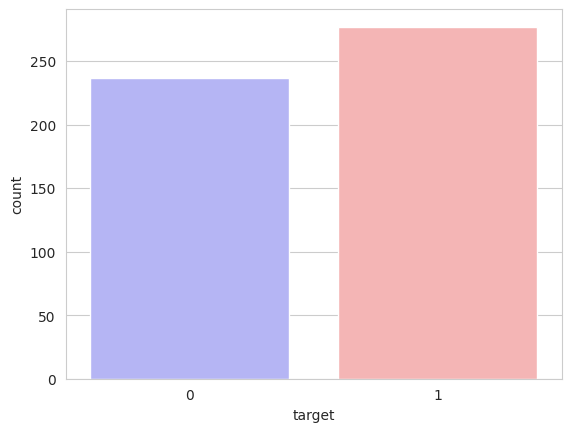

In [ ]:
df_heart.target.value_counts()
sns.countplot(x="target", data=df_heart, palette="bwr")
plt.show()

In [ ]:
df_heart.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Number of Males: 353
Number of Females: 161


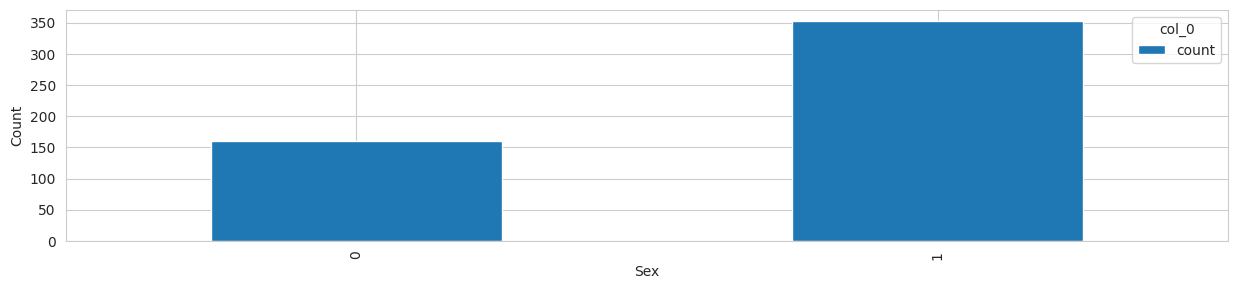

In [ ]:
# Count males and females
male_count = df_heart[df_heart['sex'] == 1].shape[0]
female_count = df_heart[df_heart['sex'] == 0].shape[0]

print(f"Number of Males: {male_count}")
print(f"Number of Females: {female_count}")

crosstab = pd.crosstab(df_heart['sex'], columns=['count'])
crosstab.plot(kind="bar", figsize=(15,3))
plt.xlabel('Sex')
plt.ylabel('Count')
plt.savefig('count.png')
plt.show()

Males with Heart Disease: 162
Females with Heart Disease: 115


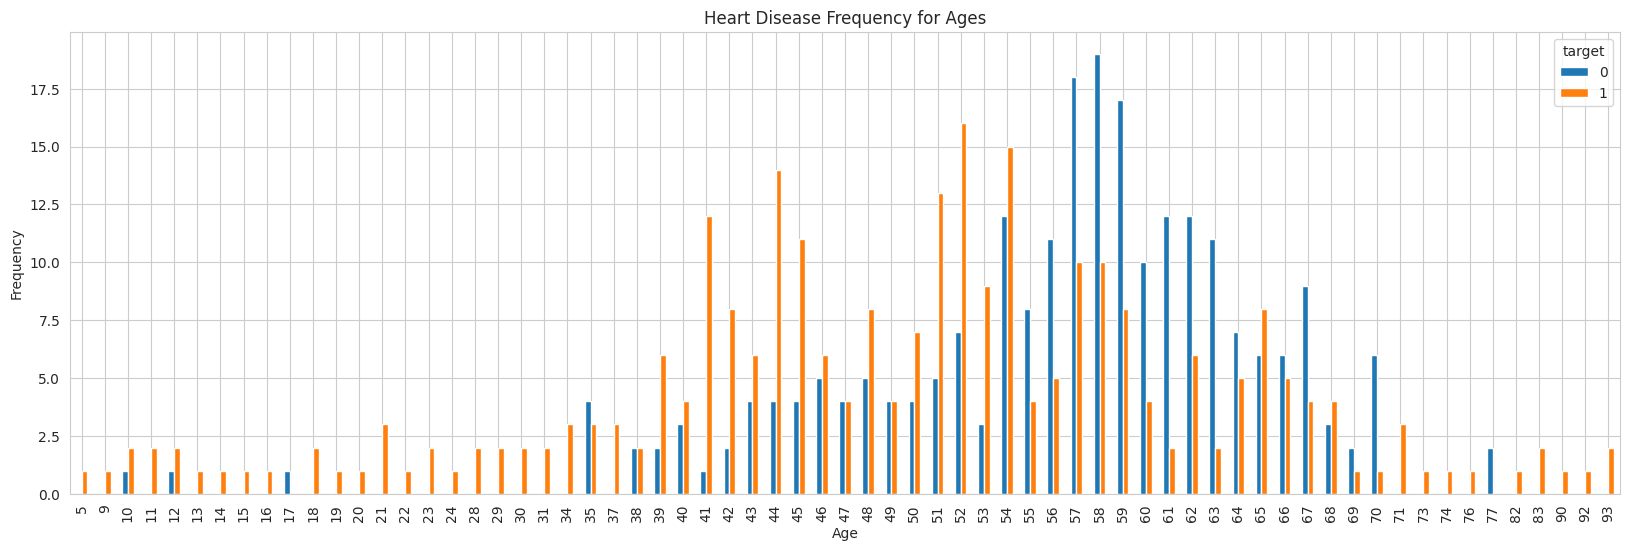

In [ ]:
# Count heart disease for males and females

heart_disease_males = df_heart[(df_heart['sex'] == 1) & (df_heart['target'] == 1)].shape[0]
heart_disease_females = df_heart[(df_heart['sex'] == 0) & (df_heart['target'] == 1)].shape[0]

print(f"Males with Heart Disease: {heart_disease_males}")
print(f"Females with Heart Disease: {heart_disease_females}")

pd.crosstab(df_heart.age,df_heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

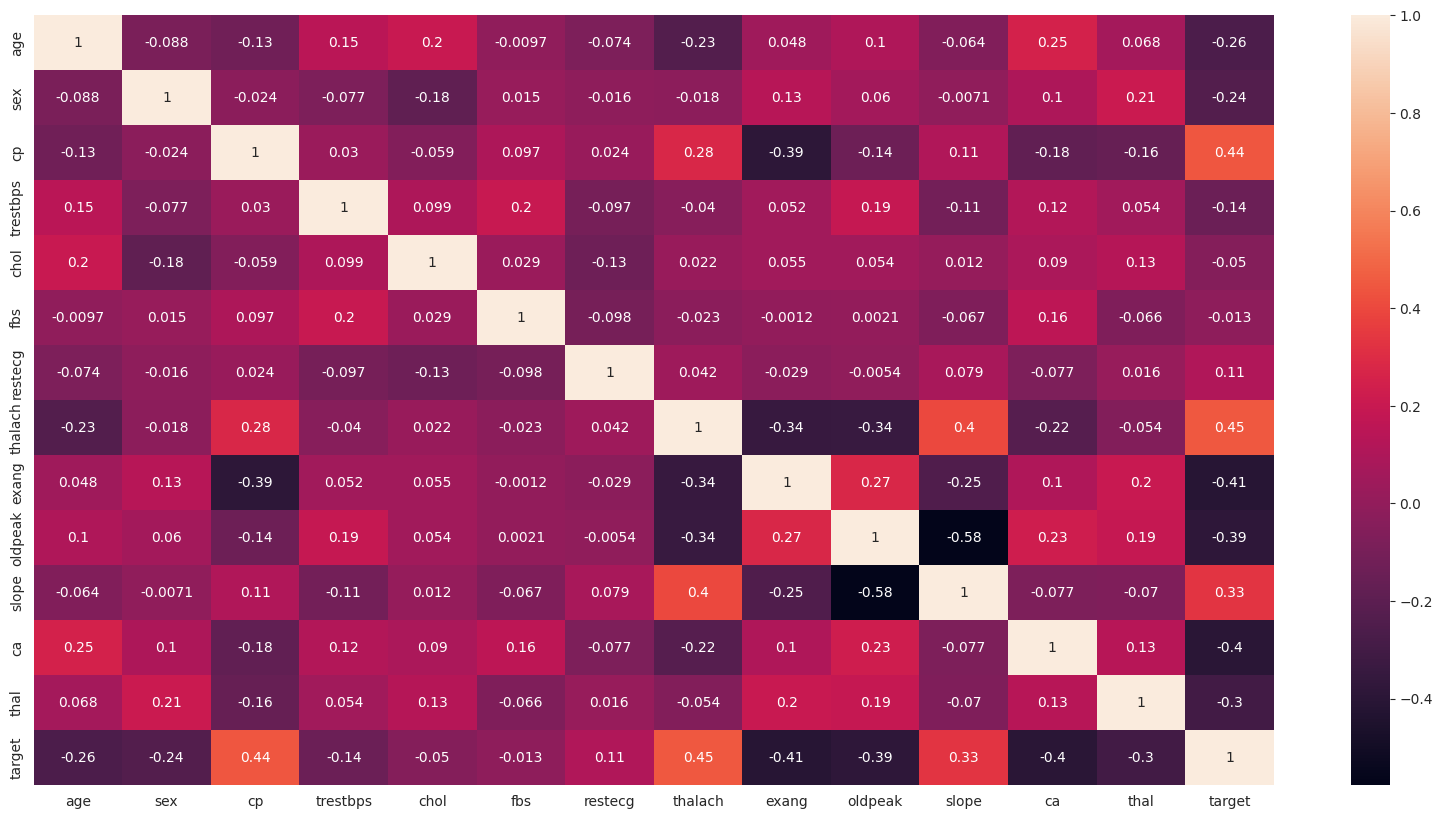

In [ ]:
#Building Correlation matrix

plt.figure(figsize=(20, 10))
sns.heatmap(df_heart.corr(), annot=True)
plt.show()

In [ ]:
# Creating Features and Target variable

df_heart['target'].value_counts()
X = df_heart.drop(columns='target', axis=1)
Y = df_heart['target']

In [ ]:
#  Splitting the data into train and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state = 42)


In [ ]:
#  Function for evaluating metrics

def evaluate_model(y_true, y_pred):

  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  return {
      "Accuracy": accuracy,
      "Precision": precision,
      "Recall": recall,
      "F1-Score": f1
  }

In [ ]:
# import accuracy library

from collections import defaultdict
accuracies = defaultdict(float)




In [ ]:
# Logistic Regression Model

from sklearn.metrics import accuracy_score, classification_report
lr = LogisticRegression()
lr.fit(X_train,Y_train)
prediction = lr.predict(X_test)
print("{} LR Test Score: {:.2f}%".format(2, lr.score(X_test, Y_test)*100))

acc = lr.score(X_train, Y_train)*100
accuracies['LR'] = acc
print("LR Train Score is {:.2f}%".format(acc))
print('Classification Report:')
print(classification_report(Y_test, prediction))

2 LR Test Score: 82.95%
LR Train Score is 84.94%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        63
           1       0.80      0.89      0.84        66

    accuracy                           0.83       129
   macro avg       0.84      0.83      0.83       129
weighted avg       0.83      0.83      0.83       129



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)
print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, Y_test)*100))
acc = knn.score(X_train, Y_train)*100

accuracies['KNN'] = acc
print("Maximum KNN Alogorithm Train Score is {:.2f}%".format(acc))
print('Classification Report:')
print(classification_report(Y_test, prediction))

2 NN Score: 74.42%
Maximum KNN Alogorithm Train Score is 91.95%
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.89      0.77        63
           1       0.85      0.61      0.71        66

    accuracy                           0.74       129
   macro avg       0.77      0.75      0.74       129
weighted avg       0.77      0.74      0.74       129



In [ ]:
# Random Forest Classification

from collections import defaultdict
accuracies = defaultdict(float)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, Y_train)
prediction = rf.predict(X_test)
print("{} Random Forest Test Score: {:.2f}%".format(2, knn.score(X_test, Y_test)*100))

acc = rf.score(X_train, Y_train)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Train Score : {:.2f}%".format(acc))
print('Classification Report:')
print(classification_report(Y_test, prediction))


2 Random Forest Test Score: 74.42%
Random Forest Algorithm Train Score : 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        63
           1       0.86      0.95      0.91        66

    accuracy                           0.90       129
   macro avg       0.90      0.90      0.90       129
weighted avg       0.90      0.90      0.90       129



<ipython-input-55-7cb828fbbac2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


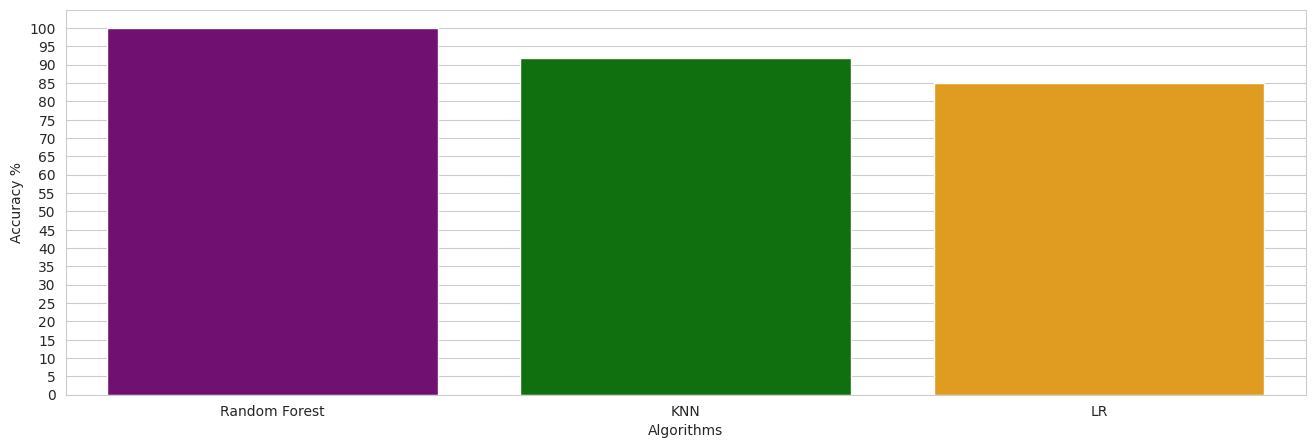

In [ ]:
colors = ["purple", "green", "orange",]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,105,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()